In [1]:
import feets.preprocess
from scipy import stats
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib
import feets
from ipykernel import kernelapp as app
import os



script_dir = os.path.dirname('Results/')
results_dir = os.path.join(script_dir, 'Images/')

if not os.path.isdir(results_dir):
    os.makedirs(results_dir)

In [16]:
url = "https://raw.githubusercontent.com/MachineLearningUniandes/MANTRA/master/data/lightcurves/transient_lightcurves.csv"
url1 = 'https://raw.githubusercontent.com/MachineLearningUniandes/MANTRA/master/data/lightcurves/transient_labels.csv'
url2 = 'https://raw.githubusercontent.com/MachineLearningUniandes/MANTRA/master/data/lightcurves/transient_info.txt'
transient_lc = pd.read_csv(url)
transient_labels = pd.read_csv(url1)
transient_info = pd.read_table(url2,skiprows=1,names=['CRTS_ID' ,'RA' ,'Dec','UT_Date','Mag','CSS_images' ,'SDSS',
                                                      'Others' ,'Followed' ,'Last','LC','FC','Classification'])

transient_info.head()

,CRTS_ID,RA,Dec,UT_Date,Mag,CSS_images,SDSS,Others,Followed,Last,LC,FC,Classification
0,CSS120828:000010-215515,0.04323,-21.92087,20120828.38,17.02,1208280210014111715,no,11171,no,2016-10-22,11171,yes,Var
1,CSS100910:000025+332543,0.10280,33.42861,20100910.42,15.85,1009101320014148188,yes,14818,no,2016-11-05,14818,yes,"CV SDSS mag 20,5"
2,CSS101127:000130+050624,0.37695,5.10657,20101127.21,15.68,1011271040014129121,no,12912,yes,2016-11-06,12912,yes,"CV mag 20,0"
3,CSS160709:000132+211336,0.38474,21.22680,20160709.45,17.21,1607091210014124380,yes,12438,no,2016-11-05,12438,yes,Blazar CRATES_J0001+2113
4,CSS110926:000156+065236,0.48205,6.87665,20110926.30,19.35,1109261070014122864,no,12286,yes,2016-11-06,12286,yes,"SN 2011hl SDSS mag 15,7 2MASX_00015920"


In [3]:
import seaborn as sns
from sklearn.ensemble import IsolationForest

In [4]:
# Reading in the feature.csv data
ft_data = pd.read_csv('features.csv',skiprows=1,names= ['Amplitude', 'AndersonDarling', 'Autocor_length', 'Beyond1Std',
                                                  'CAR_sigma', 'Con', 'Eta_e', 'Freq1_harmonics_rel_phase_1',
                                                  'LinearTrend', 'MaxSlope', 'Mean', 'Period_fit', 
                                                  'SlottedA_length','SmallKurtosis', 'StructureFunction_index_21'
                                                  ,'ID','Class'])


ft_data.head()

,Amplitude,AndersonDarling,Autocor_length,Beyond1Std,CAR_sigma,Con,Eta_e,Freq1_harmonics_rel_phase_1,LinearTrend,MaxSlope,Mean,Period_fit,SlottedA_length,SmallKurtosis,StructureFunction_index_21,ID,Class
0,1.50475,1.000000,2.0,0.411765,10.0,0.015152,1.639083e+07,0.133163,-0.000216,310.686183,20.125262,1.000000,6.0,10.438348,1.742156,TranID1209210010044118805,Flare
1,1.53220,1.000000,8.0,0.345946,10.0,0.032787,2.411989e+06,-0.209898,-0.000333,317.453004,19.331475,0.000000,1.0,3.227174,1.723731,TranID1310250040014131234,SN
2,1.24740,0.999302,2.0,0.414634,10.0,0.000000,8.020303e+06,1.009082,0.000009,123.993913,20.123456,0.970337,17.0,0.000310,1.731060,TranID1011080040044131101,SN
3,1.23785,1.000000,6.0,0.410000,10.0,0.061224,4.823456e+06,-0.119399,-0.000227,146.497039,19.704732,0.003795,2.0,1.244926,1.677341,TranID1310250070034110542,SN
4,1.36500,1.000000,30.0,0.371528,10.0,0.073427,2.173539e+05,0.397704,-0.000552,210.703834,18.261774,0.000000,3.0,1.919426,1.403380,TranID1201030070034134767,Blazar


In [5]:
params = ['Amplitude', 'AndersonDarling', 'Autocor_length', 'Beyond1Std',
                                                  'CAR_sigma', 'Con', 'Eta_e', 'Freq1_harmonics_rel_phase_1',
                                                  'LinearTrend', 'MaxSlope', 'Mean', 
                                                  'SlottedA_length','SmallKurtosis', 'StructureFunction_index_21'
                                                  ]

X = ft_data[params]

In [86]:
model=IsolationForest(n_estimators=400, max_samples='auto',max_features=1.0)
x=model.fit(X)



pred_cls = []
# Predicting the anomalies
ft_data['iforest'] = pd.Series(model.predict(X))
ft_data['iforest_Counts'] = ft_data['iforest'].map({1:0,-1:1})
# Counting the detected anomalies
print(ft_data['iforest'].value_counts())

# Analysing the predicted anomalies
pred=ft_data.loc[ft_data['iforest'] == -1]
for i in range(len(pred.ID)):
    
    
#     plt.figure(figsize=(16,4))
#     plt.xlabel('MJD')
#     plt.ylabel('Mag')
    lc = transient_lc[transient_lc['ID']==pred.ID.iloc[i]]
    
#     print(len(lc),pred.Class.iloc[i],pred.ID.iloc[i])
    pred_cls.append(pred.Class.iloc[i])
#     plt.errorbar(lc.MJD,lc.Mag,yerr=lc.Magerr,fmt='.r',label=pred.Class.iloc[i])
#     plt.legend()
#     plt.show()

 1    2429
-1      77
Name: iforest, dtype: int64


In [16]:
# for i in range(len(pred_cls)):
    
    
#     for j in range(len(transient_info.CSS_images)):
    
#         if pred.ID.iloc[i] =='TranID'+str(transient_info.CSS_images.iloc[j]) :


#             print('Class=',pred.Class.iloc[i],
#                   'RA, Dec =', transient_info.RA.iloc[j],transient_info.Dec.iloc[j]
#                  )
            
#             lc = transient_lc[transient_lc['ID']=='TranID'+str(transient_info.CSS_images.iloc[j])]
    
    
#             plt.figure(figsize=(16,4))
#             plt.xlabel('MJD')
#             plt.ylabel('Mag')
#             plt.gca().invert_yaxis()
#             plt.errorbar(lc.MJD,lc.Mag,yerr=lc.Magerr,fmt='.r',label=pred.Class.iloc[i])
#             plt.legend(fontsize=12)
#             plt.show()

Class= Var RA, Dec = 65.36359 1.48691


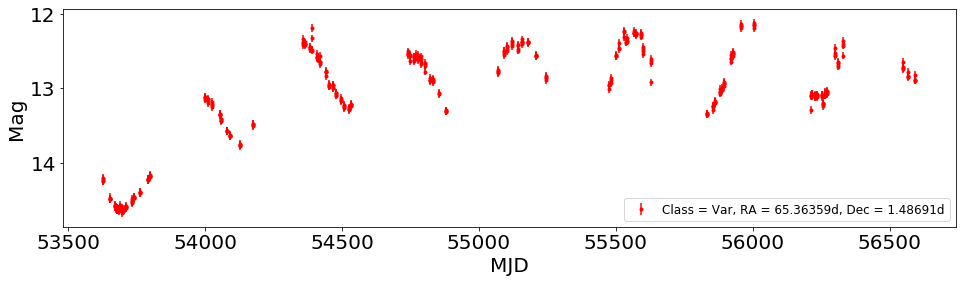

Class= Mira  RA, Dec = 64.82963000000001 14.45379


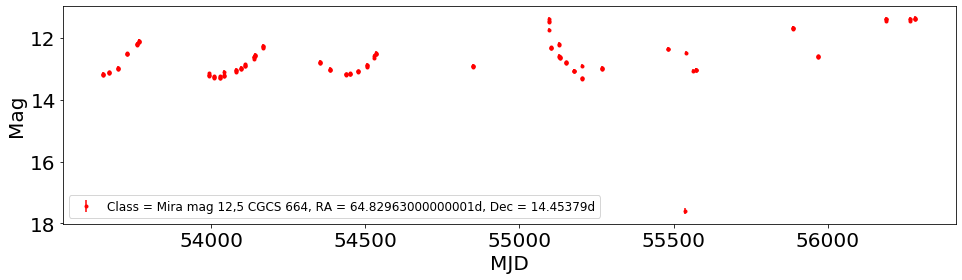

Class= YSO 2 RA, Dec = 83.24569 11.77195


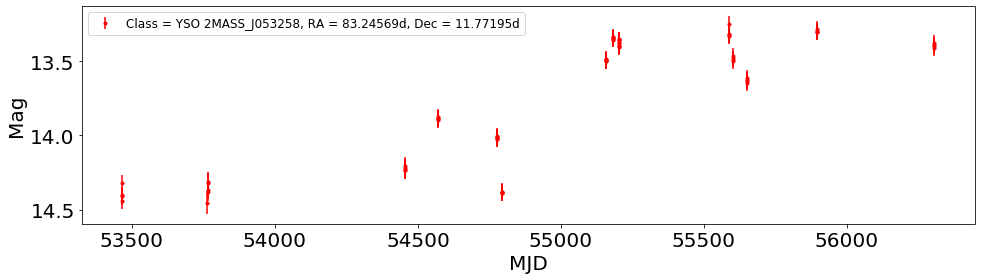

Class= LPV m RA, Dec = 81.71009000000001 24.75461


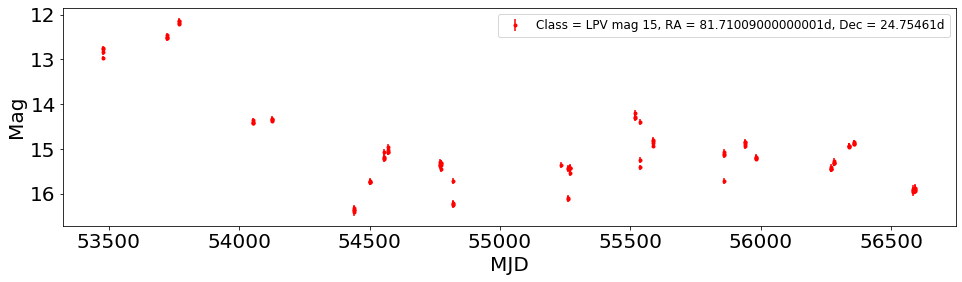

Class= Flare RA, Dec = 126.85396999999999 42.39345


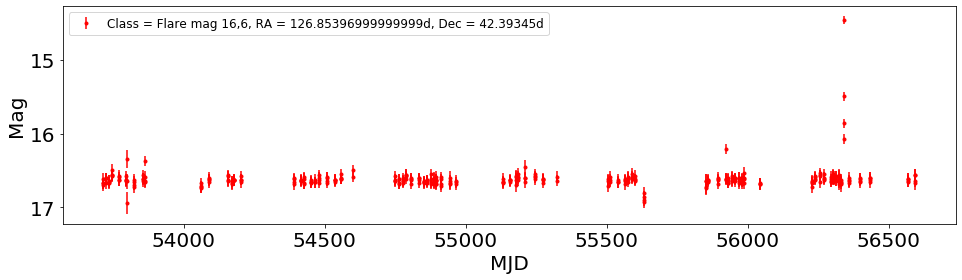

Class= CV SD RA, Dec = 156.65431999999998 47.9073


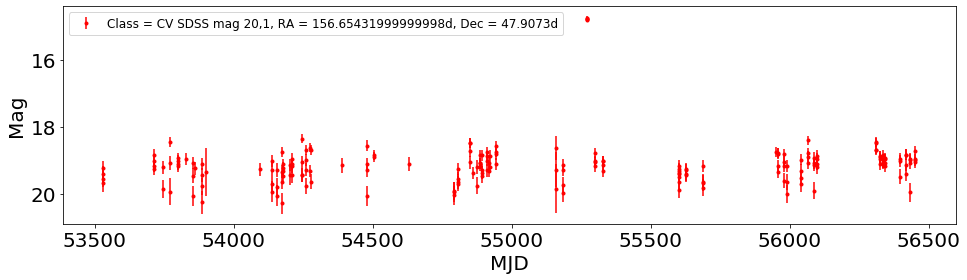

Class= Blaza RA, Dec = 160.13172 6.2894


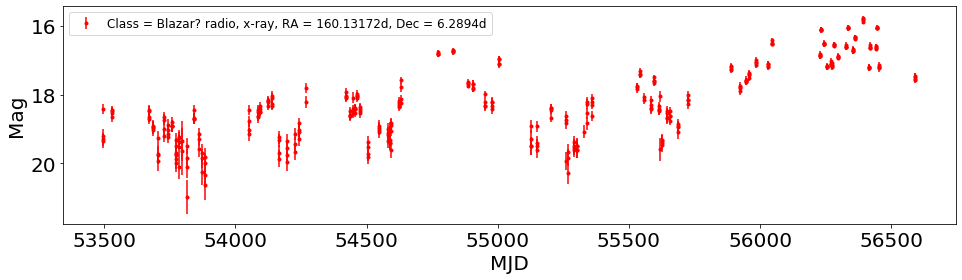

Class= HPM L RA, Dec = 177.19277 53.0853


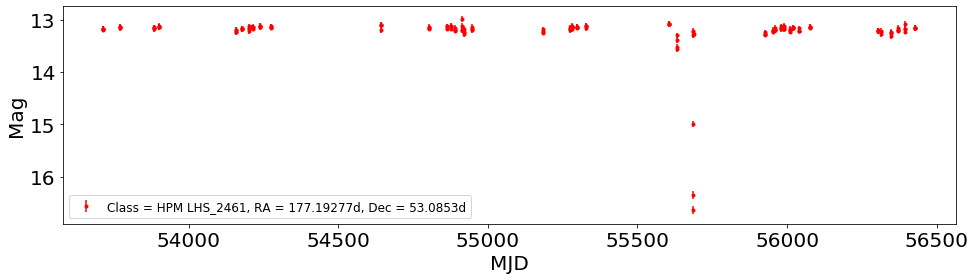

Class= SN SD RA, Dec = 210.25375 0.9993


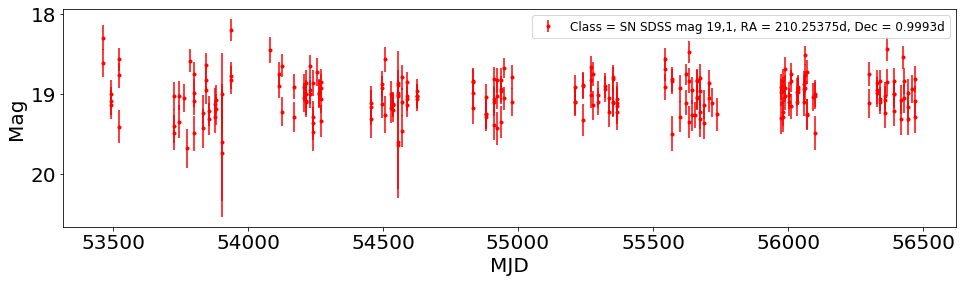

Class= Carb  RA, Dec = 331.31079 0.14602


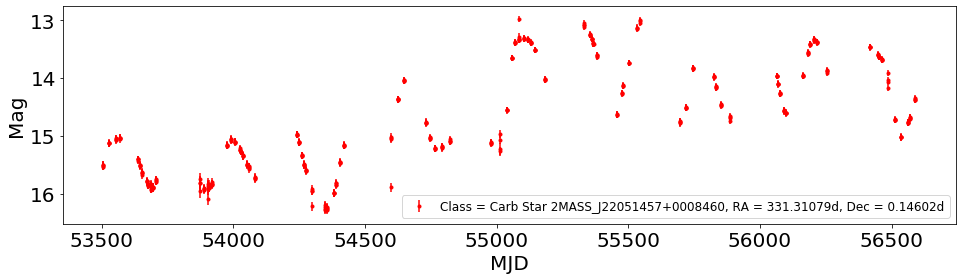

In [88]:
# Getting information about the top 10 detected anomalous objects

top10_anomalies = [1102081010244125249,910241150234105998,1111301120304120184,1503161230274181022,
                   1302181430344101379,1003171460404142882,812291070574110368,1504301520404124884,
                  1503211010754116328,909121011184202267]


Top10 = []
for ID in top10_anomalies:
    
    inf=transient_info.loc[transient_info['CSS_images'] == ID]
    lc = transient_lc[transient_lc['ID']=='TranID'+str(ID)]
    
    cls=transient_labels[transient_labels['Classification']=='Carb']
    

    lc2 = transient_lc[transient_lc['ID']=='TranID'+str(cls.TransientID.iloc[1])]
    


for i in range(len(top10_anomalies)):
    
    
    for j in range(len(transient_info.CSS_images)):
    
        if 'TranID' + str(top10_anomalies[i]) =='TranID'+str(transient_info.CSS_images.iloc[j]) :


            print('Class=',transient_info.Classification.iloc[j][:5],
                  'RA, Dec =', transient_info.RA.iloc[j],transient_info.Dec.iloc[j]
                 )
            
            lc = transient_lc[transient_lc['ID']=='TranID'+str(top10_anomalies[i])]
    
    
            plt.figure(figsize=(16,4))
            plt.xlabel('MJD')
            plt.ylabel('Mag')
            plt.gca().invert_yaxis()
            plt.errorbar(lc.MJD,lc.Mag,yerr=lc.Magerr,fmt='.r',
                         label = 'Class = {}, RA = {}d, Dec = {}d'.format(transient_info.Classification.iloc[j],
                                                                       transient_info.RA.iloc[j],
                                                                       transient_info.Dec.iloc[j]))
            plt.legend(fontsize=12)
            plt.show()

# Top 3 anomalous objects in each class

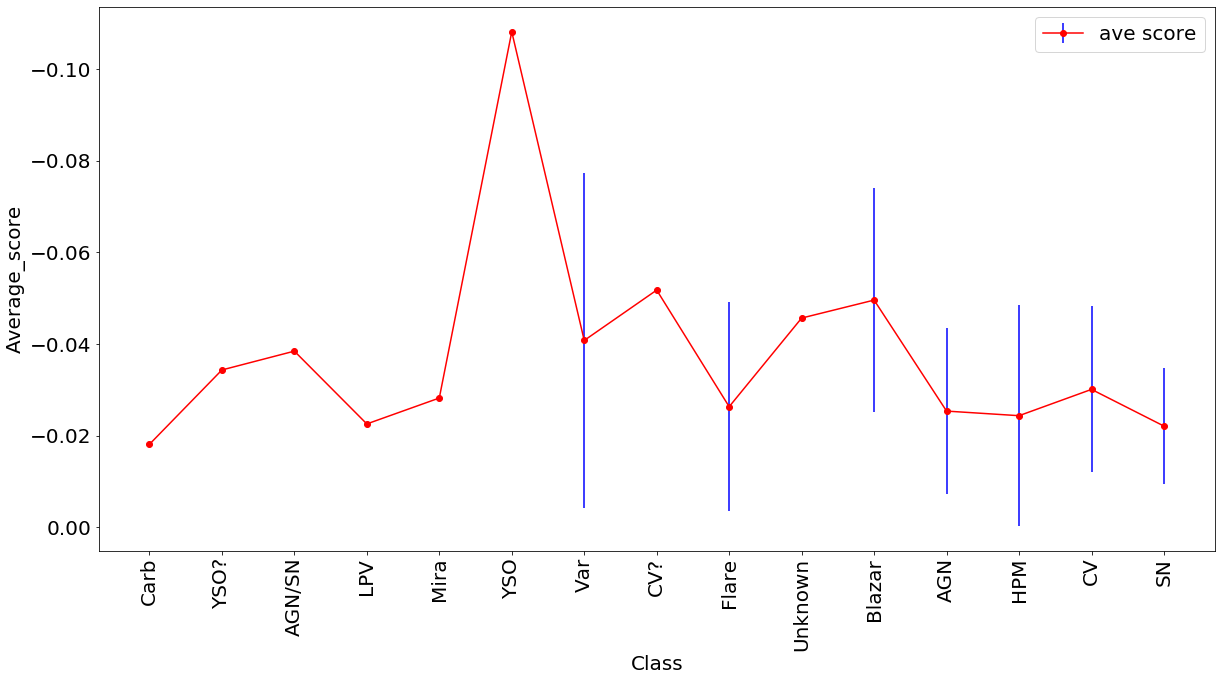

In [89]:
sklearn_score_anomalies = model.decision_function(X)

# print(sklearn_score_anomalies)

x = [i  for i in sklearn_score_anomalies]

# len(ft_data[x])

anomalies_scr=sklearn_score_anomalies
anomalies_cls = ft_data.Class


# Getting the unique classes detected as anomalous
ML_unq_cls=np.unique(pred_cls)
x = [i < 0 for i in sklearn_score_anomalies]
anomalies_scr=sklearn_score_anomalies[x]
anomalies_cls = ft_data.Class[x]
anomalies_ID = ft_data.ID[x]

# Getting the number of objects in each anomalous class 
# based on the transient label data
len_anm = []
for i in ML_unq_cls:
    
    lb = transient_labels[transient_labels['Classification']==i]   
    len_anm.append(len(lb))


# Sorting the classes in ascending based on the number of
# objects in each class (i.e most anomalous to least anomalous)
cls = []  
for i in range(0,max(len_anm)+1): 
    
    for j in range(len(len_anm)): 
        
        if len_anm[j] == i: 
            cls.append(ML_unq_cls[j])
            
                        
# Calculating the average and std of the anom
# scores
sstd,aave = [],[]
for j in range(len(cls)):
    scr = []
    for i in range(len(anomalies_cls)):
    
        if anomalies_cls.iloc[i] == cls[j]:
            
            scr.append(anomalies_scr[i])
            
#             print(anomalies_cls.iloc[i],anomalies_scr[i])
#     print(scr,np.std(scr))       
    std=np.std(scr)
    ave=np.average(scr)   
    sstd.append(std);aave.append(ave)
    
#     print(ave,std)
    
    

    
# Plotting the anomalous objects based on their score 
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(20,10))
df = pd.DataFrame({"id":cls, 
                   "score":aave,
                   'error':sstd
                   })
plt.errorbar(np.arange(len(df['id'])), df['score'],yerr=df['error'],fmt='-ro',ecolor='b',label='ave score')
ax = plt.gca()
ax.xaxis.set_ticks(np.arange(len(df['id'])))
ax.xaxis.set_ticklabels(df['id'], rotation=90)
plt.xlabel("Class")
plt.ylabel("Average_score")
plt.gca().invert_yaxis()
plt.legend()
plt.savefig(results_dir + 'ave_score.png',bbox_inches="tight")
plt.show()

In [90]:
anomalies_ID

216     TranID1510130260134113719
218     TranID1609221010114117243
260     TranID1201251260114103174
265     TranID1303141290134114251
278     TranID1011070010184229345
                  ...            
2389    TranID1303071090774127988
2407    TranID1401200150784129813
2408    TranID1201230150784136277
2453    TranID1604190070904103478
2479    TranID1506191071194103098
Name: ID, Length: 77, dtype: object

In [1]:
# uniq_anm_cls = np.unique(anomalies_cls)


# clsss,ID,Scr = [],[],[]
# for i in uniq_anm_cls:
    
#     x = []
#     for j in range(len(anomalies_ID)):
        
#         if anomalies_cls.iloc[j] == i:
            
#             x.append(anomalies_ID.iloc[j])
            
# #             print(anomalies_scr[j])
            
#             lc = transient_lc[transient_lc['ID']==anomalies_ID.iloc[j]]
            
#             Inf = transient_info[transient_info['CSS_images']==int(anomalies_ID.iloc[j][6:])]

#             cls = Inf.Classification.iloc[0]
            
#             print(anomalies_scr[j],cls,anomalies_ID.iloc[j])
            
#             clsss.append(cls);ID.append(anomalies_ID.iloc[j]);Scr.append(anomalies_scr[j])
    
    
#             plt.figure(figsize=(16,4))
#             plt.xlabel('MJD')
#             plt.ylabel('Mag')
#             plt.gca().invert_yaxis()
#             plt.errorbar(lc.MJD,lc.Mag,yerr=lc.Magerr,fmt='.r',
#                          label = 'Class = {}, RA = {}d, Dec = {}d'.format(Inf.Classification.iloc[0],
#                                                                        Inf.RA.iloc[0],
#                                                                        Inf.Dec.iloc[0]))
#             plt.legend(fontsize=12)
#             plt.show()


In [108]:
AGN=['TranID1301171290494101134','TranID1004051040704109194','TranID1003201460504104696']
Blazar = ['TranID907311380634104253','TranID1103290230684131567','TranID1412231010584107248']
CV = ['TranID1304181400734166981','TranID802271010724123230','TranID1301311380344128824']
Carb =['TranID909121011184202267']
Flare=['TranID1001081010294126339','TranID1504161150534121066','TranID801180120604112518']
HPM=['TranID1204011460504139961','TranID1411200040324146816','TranID1504301520404124884']
LPV =['TranID1503161230274181022']
Mira=['TranID910241150234105998']
SN =['TranID902261320644130818','TranID1503211010754116328','TranID1303071090774127988']
unkown=['TranID1101041230144125008']
Var = ['TranID1102081010244125249','TranID1212101350304169390']
YSO = ['TranID1205260230814129756']


# AGN

In [2]:
# plt.figure(figsize=(22,10))


# lc = transient_lc[transient_lc['ID']==anomalies_ID.iloc[j]]
            
# Inf = transient_info[transient_info['CSS_images']==int(AGN[0][6:])]


# plt.subplot(311)
# lc = transient_lc[transient_lc['ID']==AGN[0]]
# plt.errorbar(lc.MJD,lc.Mag,yerr=lc.Magerr,fmt='.r',label = 'Class = {}, RA = {}d, Dec = {}d'.format(Inf.Classification.iloc[0],
#                                                                        Inf.RA.iloc[0],
#                                                                        Inf.Dec.iloc[0]))


# plt.legend(fontsize=12)
# plt.xlabel('MJD')
# plt.ylabel('Mag')



# Inf = transient_info[transient_info['CSS_images']==int(AGN[1][6:])]
# plt.subplot(312)
# lc = transient_lc[transient_lc['ID']==AGN[1]]
# plt.errorbar(lc.MJD,lc.Mag,yerr=lc.Magerr,fmt='.r',label = 'Class = {}, RA = {}d, Dec = {}d'.format(Inf.Classification.iloc[0],
#                                                                        Inf.RA.iloc[0],
#                                                                        Inf.Dec.iloc[0]))
# plt.legend(fontsize=12)
# plt.xlabel('MJD')
# plt.ylabel('Mag')


# Inf = transient_info[transient_info['CSS_images']==int(AGN[2][6:])]
# plt.subplot(313)
# lc = transient_lc[transient_lc['ID']==AGN[2]]
# plt.errorbar(lc.MJD,lc.Mag,yerr=lc.Magerr,fmt='.r',label = 'Class = {}, RA = {}d, Dec = {}d'.format(Inf.Classification.iloc[0],
#                                                                        Inf.RA.iloc[0],
#                                                                        Inf.Dec.iloc[0]))
# plt.legend(fontsize=12)
# plt.xlabel('MJD')
# plt.ylabel('Mag')


# plt.savefig(results_dir + '3Anm_AGN.png',bbox_inches="tight") 
# plt.show()

In [3]:
# plt.figure(figsize=(22,10))


# lc = transient_lc[transient_lc['ID']==anomalies_ID.iloc[j]]
            
# Inf = transient_info[transient_info['CSS_images']==int(Blazar[0][6:])]


# plt.subplot(311)
# lc = transient_lc[transient_lc['ID']==Blazar[0]]
# plt.errorbar(lc.MJD,lc.Mag,yerr=lc.Magerr,fmt='.r',label = 'Class = {}, RA = {}d, Dec = {}d'.format(Inf.Classification.iloc[0],
#                                                                        Inf.RA.iloc[0],
#                                                                        Inf.Dec.iloc[0]))


# plt.legend(fontsize=12)
# plt.xlabel('MJD')
# plt.ylabel('Mag')



# Inf = transient_info[transient_info['CSS_images']==int(Blazar[1][6:])]
# plt.subplot(312)
# lc = transient_lc[transient_lc['ID']==Blazar[1]]
# plt.errorbar(lc.MJD,lc.Mag,yerr=lc.Magerr,fmt='.r',label = 'Class = {}, RA = {}d, Dec = {}d'.format(Inf.Classification.iloc[0],
#                                                                        Inf.RA.iloc[0],
#                                                                        Inf.Dec.iloc[0]))
# plt.legend(fontsize=12)
# plt.xlabel('MJD')
# plt.ylabel('Mag')


# Inf = transient_info[transient_info['CSS_images']==int(Blazar[2][6:])]
# plt.subplot(313)
# lc = transient_lc[transient_lc['ID']==Blazar[2]]
# plt.errorbar(lc.MJD,lc.Mag,yerr=lc.Magerr,fmt='.r',label = 'Class = {}, RA = {}d, Dec = {}d'.format(Inf.Classification.iloc[0],
#                                                                        Inf.RA.iloc[0],
#                                                                        Inf.Dec.iloc[0]))
# plt.legend(fontsize=12)
# plt.xlabel('MJD')
# plt.ylabel('Mag')


# plt.savefig(results_dir + '3Anm_Blazar.png',bbox_inches="tight") 
# plt.show()

In [4]:
# plt.figure(figsize=(22,10))


# lc = transient_lc[transient_lc['ID']==anomalies_ID.iloc[j]]
            
# Inf = transient_info[transient_info['CSS_images']==int(CV[0][6:])]


# plt.subplot(311)
# lc = transient_lc[transient_lc['ID']==CV[0]]
# plt.errorbar(lc.MJD,lc.Mag,yerr=lc.Magerr,fmt='.r',label = 'Class = {}, RA = {}d, Dec = {}d'.format(Inf.Classification.iloc[0],
#                                                                        Inf.RA.iloc[0],
#                                                                        Inf.Dec.iloc[0]))


# plt.legend(fontsize=12)
# plt.xlabel('MJD')
# plt.ylabel('Mag')



# Inf = transient_info[transient_info['CSS_images']==int(CV[1][6:])]
# plt.subplot(312)
# lc = transient_lc[transient_lc['ID']==CV[1]]
# plt.errorbar(lc.MJD,lc.Mag,yerr=lc.Magerr,fmt='.r',label = 'Class = {}, RA = {}d, Dec = {}d'.format(Inf.Classification.iloc[0],
#                                                                        Inf.RA.iloc[0],
#                                                                        Inf.Dec.iloc[0]))
# plt.legend(fontsize=12)
# plt.xlabel('MJD')
# plt.ylabel('Mag')


# Inf = transient_info[transient_info['CSS_images']==int(CV[2][6:])]
# plt.subplot(313)
# lc = transient_lc[transient_lc['ID']==CV[2]]
# plt.errorbar(lc.MJD,lc.Mag,yerr=lc.Magerr,fmt='.r',label = 'Class = {}, RA = {}d, Dec = {}d'.format(Inf.Classification.iloc[0],
#                                                                        Inf.RA.iloc[0],
#                                                                        Inf.Dec.iloc[0]))
# plt.legend(fontsize=12)
# plt.xlabel('MJD')
# plt.ylabel('Mag')


# plt.savefig(results_dir + '3Anm_CV.png',bbox_inches="tight") 
# plt.show()

In [5]:
# plt.figure(figsize=(22,10))


# lc = transient_lc[transient_lc['ID']==anomalies_ID.iloc[j]]
            
# Inf = transient_info[transient_info['CSS_images']==int(Carb[0][6:])]


# plt.subplot(311)
# lc = transient_lc[transient_lc['ID']==Carb[0]]
# plt.errorbar(lc.MJD,lc.Mag,yerr=lc.Magerr,fmt='.r',label = 'Class = {}, RA = {}d, Dec = {}d'.format(Inf.Classification.iloc[0],
#                                                                        Inf.RA.iloc[0],
#                                                                        Inf.Dec.iloc[0]))


# plt.legend(fontsize=12)
# plt.xlabel('MJD')
# plt.ylabel('Mag')


# plt.savefig(results_dir + '3Anm_Carb.png',bbox_inches="tight") 
# plt.show()

In [6]:
# plt.figure(figsize=(22,10))



            
# Inf = transient_info[transient_info['CSS_images']==int(Carb[0][6:])]
# lc = transient_lc[transient_lc['ID']==Carb[0]]
# plt.errorbar(lc.MJD,lc.Mag,yerr=lc.Magerr,fmt='.r',label = 'Class = {}, RA = {}d, Dec = {}d'.format(Inf.Classification.iloc[0],
#                                                                        Inf.RA.iloc[0],
#                                                                        Inf.Dec.iloc[0]))


# plt.legend(fontsize=12)
# plt.xlabel('MJD')
# plt.ylabel('Mag')


# plt.savefig(results_dir + '3Anm_Carb.png',bbox_inches="tight") 
# plt.show()

In [7]:
# plt.figure(figsize=(22,10))


# lc = transient_lc[transient_lc['ID']==anomalies_ID.iloc[j]]
            
# Inf = transient_info[transient_info['CSS_images']==int(Flare[0][6:])]


# plt.subplot(311)
# lc = transient_lc[transient_lc['ID']==Flare[0]]
# plt.errorbar(lc.MJD,lc.Mag,yerr=lc.Magerr,fmt='.r',label = 'Class = {}, RA = {}d, Dec = {}d'.format(Inf.Classification.iloc[0],
#                                                                        Inf.RA.iloc[0],
#                                                                        Inf.Dec.iloc[0]))


# plt.legend(fontsize=12)
# plt.xlabel('MJD')
# plt.ylabel('Mag')



# Inf = transient_info[transient_info['CSS_images']==int(Flare[1][6:])]
# plt.subplot(312)
# lc = transient_lc[transient_lc['ID']==Flare[1]]
# plt.errorbar(lc.MJD,lc.Mag,yerr=lc.Magerr,fmt='.r',label = 'Class = {}, RA = {}d, Dec = {}d'.format(Inf.Classification.iloc[0],
#                                                                        Inf.RA.iloc[0],
#                                                                        Inf.Dec.iloc[0]))
# plt.legend(fontsize=12)
# plt.xlabel('MJD')
# plt.ylabel('Mag')


# Inf = transient_info[transient_info['CSS_images']==int(Flare[2][6:])]
# plt.subplot(313)
# lc = transient_lc[transient_lc['ID']==Flare[2]]
# plt.errorbar(lc.MJD,lc.Mag,yerr=lc.Magerr,fmt='.r',label = 'Class = {}, RA = {}d, Dec = {}d'.format(Inf.Classification.iloc[0],
#                                                                        Inf.RA.iloc[0],
#                                                                        Inf.Dec.iloc[0]))
# plt.legend(fontsize=12)
# plt.xlabel('MJD')
# plt.ylabel('Mag')


# plt.savefig(results_dir + '3Anm_Flare.png',bbox_inches="tight") 
# plt.show()

In [8]:
# plt.figure(figsize=(22,10))


# lc = transient_lc[transient_lc['ID']==anomalies_ID.iloc[j]]
            
# Inf = transient_info[transient_info['CSS_images']==int(HPM[0][6:])]


# plt.subplot(311)
# lc = transient_lc[transient_lc['ID']==HPM[0]]
# plt.errorbar(lc.MJD,lc.Mag,yerr=lc.Magerr,fmt='.r',label = 'Class = {}, RA = {}d, Dec = {}d'.format(Inf.Classification.iloc[0],
#                                                                        Inf.RA.iloc[0],
#                                                                        Inf.Dec.iloc[0]))


# plt.legend(fontsize=12)
# plt.xlabel('MJD')
# plt.ylabel('Mag')



# Inf = transient_info[transient_info['CSS_images']==int(HPM[1][6:])]
# plt.subplot(312)
# lc = transient_lc[transient_lc['ID']==HPM[1]]
# plt.errorbar(lc.MJD,lc.Mag,yerr=lc.Magerr,fmt='.r',label = 'Class = {}, RA = {}d, Dec = {}d'.format(Inf.Classification.iloc[0],
#                                                                        Inf.RA.iloc[0],
#                                                                        Inf.Dec.iloc[0]))
# plt.legend(fontsize=12)
# plt.xlabel('MJD')
# plt.ylabel('Mag')


# Inf = transient_info[transient_info['CSS_images']==int(HPM[2][6:])]
# plt.subplot(313)
# lc = transient_lc[transient_lc['ID']==HPM[2]]
# plt.errorbar(lc.MJD,lc.Mag,yerr=lc.Magerr,fmt='.r',label = 'Class = {}, RA = {}d, Dec = {}d'.format(Inf.Classification.iloc[0],
#                                                                        Inf.RA.iloc[0],
#                                                                        Inf.Dec.iloc[0]))
# plt.legend(fontsize=12)
# plt.xlabel('MJD')
# plt.ylabel('Mag')


# plt.savefig(results_dir + '3Anm_HPM.png',bbox_inches="tight") 
# plt.show()

In [9]:
# plt.figure(figsize=(22,10))


# lc = transient_lc[transient_lc['ID']==anomalies_ID.iloc[j]]
            
# Inf = transient_info[transient_info['CSS_images']==int(LPV[0][6:])]


# plt.subplot(311)
# lc = transient_lc[transient_lc['ID']==LPV[0]]
# plt.errorbar(lc.MJD,lc.Mag,yerr=lc.Magerr,fmt='.r',label = 'Class = {}, RA = {}d, Dec = {}d'.format(Inf.Classification.iloc[0],
#                                                                        Inf.RA.iloc[0],
#                                                                        Inf.Dec.iloc[0]))


# plt.legend(fontsize=12)
# plt.xlabel('MJD')
# plt.ylabel('Mag')





# plt.savefig(results_dir + '3Anm_LPV.png',bbox_inches="tight") 
# plt.show()

In [10]:
# plt.figure(figsize=(22,10))


# lc = transient_lc[transient_lc['ID']==anomalies_ID.iloc[j]]
            
# Inf = transient_info[transient_info['CSS_images']==int(Mira[0][6:])]


# plt.subplot(311)
# lc = transient_lc[transient_lc['ID']==Mira[0]]
# plt.errorbar(lc.MJD,lc.Mag,yerr=lc.Magerr,fmt='.r',label = 'Class = {}, RA = {}d, Dec = {}d'.format(Inf.Classification.iloc[0],
#                                                                        Inf.RA.iloc[0],
#                                                                        Inf.Dec.iloc[0]))


# plt.legend(fontsize=12)
# plt.xlabel('MJD')
# plt.ylabel('Mag')



# plt.savefig(results_dir + '3Anm_Mira.png',bbox_inches="tight") 
# plt.show()

In [11]:
# plt.figure(figsize=(22,10))


# lc = transient_lc[transient_lc['ID']==anomalies_ID.iloc[j]]
            
# Inf = transient_info[transient_info['CSS_images']==int(SN[0][6:])]


# plt.subplot(311)
# lc = transient_lc[transient_lc['ID']==SN[0]]
# plt.errorbar(lc.MJD,lc.Mag,yerr=lc.Magerr,fmt='.r',label = 'Class = {}, RA = {}d, Dec = {}d'.format(Inf.Classification.iloc[0],
#                                                                        Inf.RA.iloc[0],
#                                                                        Inf.Dec.iloc[0]))


# plt.legend(fontsize=12)
# plt.xlabel('MJD')
# plt.ylabel('Mag')



# Inf = transient_info[transient_info['CSS_images']==int(SN[1][6:])]
# plt.subplot(312)
# lc = transient_lc[transient_lc['ID']==SN[1]]
# plt.errorbar(lc.MJD,lc.Mag,yerr=lc.Magerr,fmt='.r',label = 'Class = {}, RA = {}d, Dec = {}d'.format(Inf.Classification.iloc[0],
#                                                                        Inf.RA.iloc[0],
#                                                                        Inf.Dec.iloc[0]))
# plt.legend(fontsize=12)
# plt.xlabel('MJD')
# plt.ylabel('Mag')


# Inf = transient_info[transient_info['CSS_images']==int(SN[2][6:])]
# plt.subplot(313)
# lc = transient_lc[transient_lc['ID']==SN[2]]
# plt.errorbar(lc.MJD,lc.Mag,yerr=lc.Magerr,fmt='.r',label = 'Class = {}, RA = {}d, Dec = {}d'.format(Inf.Classification.iloc[0],
#                                                                        Inf.RA.iloc[0],
#                                                                        Inf.Dec.iloc[0]))
# plt.legend(fontsize=12)
# plt.xlabel('MJD')
# plt.ylabel('Mag')


# plt.savefig(results_dir + '3Anm_SN.png',bbox_inches="tight") 
# plt.show()

In [12]:
# plt.figure(figsize=(22,10))


# lc = transient_lc[transient_lc['ID']==anomalies_ID.iloc[j]]
            
# Inf = transient_info[transient_info['CSS_images']==int(unkown[0][6:])]



# lc = transient_lc[transient_lc['ID']==unkown[0]]
# plt.errorbar(lc.MJD,lc.Mag,yerr=lc.Magerr,fmt='.r',label = 'Class = {}, RA = {}d, Dec = {}d'.format(Inf.Classification.iloc[0],
#                                                                        Inf.RA.iloc[0],
#                                                                        Inf.Dec.iloc[0]))


# plt.legend(fontsize=12)
# plt.xlabel('MJD')
# plt.ylabel('Mag')





# plt.savefig(results_dir + '3Anm_unkown.png',bbox_inches="tight") 
# plt.show()

In [13]:
# plt.figure(figsize=(22,10))


# lc = transient_lc[transient_lc['ID']==anomalies_ID.iloc[j]]
            
# Inf = transient_info[transient_info['CSS_images']==int(Var[0][6:])]


# plt.subplot(311)
# lc = transient_lc[transient_lc['ID']==Var[0]]
# plt.errorbar(lc.MJD,lc.Mag,yerr=lc.Magerr,fmt='.r',label = 'Class = {}, RA = {}d, Dec = {}d'.format(Inf.Classification.iloc[0],
#                                                                        Inf.RA.iloc[0],
#                                                                        Inf.Dec.iloc[0]))


# plt.legend(fontsize=12)
# plt.xlabel('MJD')
# plt.ylabel('Mag')



# Inf = transient_info[transient_info['CSS_images']==int(Var[1][6:])]
# plt.subplot(312)
# lc = transient_lc[transient_lc['ID']==Var[1]]
# plt.errorbar(lc.MJD,lc.Mag,yerr=lc.Magerr,fmt='.r',label = 'Class = {}, RA = {}d, Dec = {}d'.format(Inf.Classification.iloc[0],
#                                                                        Inf.RA.iloc[0],
#                                                                        Inf.Dec.iloc[0]))
# plt.legend(fontsize=12)
# plt.xlabel('MJD')
# plt.ylabel('Mag')



# plt.savefig(results_dir + '3Anm_var.png',bbox_inches="tight") 
# plt.show()

In [14]:
# plt.figure(figsize=(22,10))


# lc = transient_lc[transient_lc['ID']==anomalies_ID.iloc[j]]
            
# Inf = transient_info[transient_info['CSS_images']==int(YSO[0][6:])]


# plt.subplot(311)
# lc = transient_lc[transient_lc['ID']==YSO[0]]
# plt.errorbar(lc.MJD,lc.Mag,yerr=lc.Magerr,fmt='.r',label = 'Class = {}, RA = {}d, Dec = {}d'.format(Inf.Classification.iloc[0],
#                                                                        Inf.RA.iloc[0],
#                                                                        Inf.Dec.iloc[0]))


# plt.legend(fontsize=12)
# plt.xlabel('MJD')
# plt.ylabel('Mag')


# plt.savefig(results_dir + '3Anm_YSO.png',bbox_inches="tight") 
# plt.show()

In [15]:


# c='TranID1104291400294112297'

# for i in range(len(transient_labels)):
    
    
#     if transient_labels.TransientID.iloc[i]== int(c[6:]):
        
#         print(transient_labels.Classification.iloc[i])

